# Dataset Download

In [ ]:
from google.colab import files

In [ ]:
!pip install -q kaggle

In [ ]:
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d danofer/sarcasm

 94% 204M/216M [00:02<00:00, 123MB/s]
100% 216M/216M [00:02<00:00, 90.7MB/s]


In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from zipfile import ZipFile
with ZipFile("sarcasm.zip", 'r') as myzip:
    myzip.extractall(".")

In [ ]:
PATH_TO_TRAIN = '/content/train-balanced-sarcasm.csv'

In [ ]:
import os
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegressionCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
train_df = pd.read_csv(PATH_TO_TRAIN)

# Pre-Processing

In [ ]:
train_df.head(50)

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,0,NC and NH.,Trumpbart,politics,2,-1,-1,2016-10,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd ..."
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4,-1,-1,2016-11,2016-11-01 00:24:10,The blazers and Mavericks (The wests 5 and 6 s...
2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3,3,0,2016-09,2016-09-22 21:45:37,They're favored to win.
3,0,"This meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8,-1,-1,2016-10,2016-10-18 21:03:47,deadass don't kill my buzz
4,0,I could use one of those tools.,cush2push,MaddenUltimateTeam,6,-1,-1,2016-12,2016-12-30 17:00:13,Yep can confirm I saw the tool they use for th...
5,0,"I don't pay attention to her, but as long as s...",only7inches,AskReddit,0,0,0,2016-09,2016-09-02 10:35:08,do you find ariana grande sexy ?
6,0,Trick or treating in general is just weird...,only7inches,AskReddit,1,-1,-1,2016-10,2016-10-23 21:43:03,What's your weird or unsettling Trick or Treat...
7,0,Blade Mastery+Masamune or GTFO!,P0k3rm4s7,FFBraveExvius,2,-1,-1,2016-10,2016-10-13 21:13:55,Probably Sephiroth. I refuse to taint his grea...
8,0,"You don't have to, you have a good build, buy ...",SoupToPots,pcmasterrace,1,-1,-1,2016-10,2016-10-27 19:11:06,What to upgrade? I have $500 to spend (mainly ...
9,0,I would love to see him at lolla.,chihawks,Lollapalooza,2,-1,-1,2016-11,2016-11-21 23:39:12,Probably count Kanye out Since the rest of his...


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1010773 entries, 0 to 1010825
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   label           1010773 non-null  int64 
 1   comment         1010773 non-null  object
 2   author          1010773 non-null  object
 3   subreddit       1010773 non-null  object
 4   score           1010773 non-null  int64 
 5   ups             1010773 non-null  int64 
 6   downs           1010773 non-null  int64 
 7   date            1010773 non-null  object
 8   created_utc     1010773 non-null  object
 9   parent_comment  1010773 non-null  object
dtypes: int64(4), object(6)
memory usage: 84.8+ MB


In [ ]:
train_df.dropna(subset=['parent_comment'], inplace=True)
train_df.dropna(subset=['label'], inplace=True)
train_df.dropna(subset=['comment'], inplace=True)

In [ ]:
import re

In [ ]:
def preprocessing_text(s):
    s = str(s).lower().strip()
    s = re.sub('\n', '', s)
    s = re.sub(r"([?!,+=—&%\'\";:¿।।।|\(\){}\[\]//])", r" \1 ", s)
    s = re.sub('[ ]{2,}', ' ', s).strip()
    
    return s

In [ ]:
train_df['parent_comment'] = train_df['parent_comment'].apply(preprocessing_text)
train_df['comment'] = train_df['comment'].apply(preprocessing_text)
train_df.head()

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,0,nc and nh.,Trumpbart,politics,2,-1,-1,2016-10,2016-10-16 23:55:23,"yeah , i get that argument. at this point , i ..."
1,0,you do know west teams play against west teams...,Shbshb906,nba,-4,-1,-1,2016-11,2016-11-01 00:24:10,the blazers and mavericks ( the wests 5 and 6 ...
2,0,"they were underdogs earlier today , but since ...",Creepeth,nfl,3,3,0,2016-09,2016-09-22 21:45:37,they ' re favored to win.
3,0,"this meme isn ' t funny none of the "" new york...",icebrotha,BlackPeopleTwitter,-8,-1,-1,2016-10,2016-10-18 21:03:47,deadass don ' t kill my buzz
4,0,i could use one of those tools.,cush2push,MaddenUltimateTeam,6,-1,-1,2016-12,2016-12-30 17:00:13,yep can confirm i saw the tool they use for th...


In [ ]:
pd.set_option('display.max_rows', train_df.shape[0]+1)

In [ ]:
train_df.head(50)

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,0,nc and nh.,Trumpbart,politics,2,-1,-1,2016-10,2016-10-16 23:55:23,"yeah , i get that argument. at this point , i ..."
1,0,you do know west teams play against west teams...,Shbshb906,nba,-4,-1,-1,2016-11,2016-11-01 00:24:10,the blazers and mavericks ( the wests 5 and 6 ...
2,0,"they were underdogs earlier today , but since ...",Creepeth,nfl,3,3,0,2016-09,2016-09-22 21:45:37,they ' re favored to win.
3,0,"this meme isn ' t funny none of the "" new york...",icebrotha,BlackPeopleTwitter,-8,-1,-1,2016-10,2016-10-18 21:03:47,deadass don ' t kill my buzz
4,0,i could use one of those tools.,cush2push,MaddenUltimateTeam,6,-1,-1,2016-12,2016-12-30 17:00:13,yep can confirm i saw the tool they use for th...
5,0,"i don ' t pay attention to her , but as long a...",only7inches,AskReddit,0,0,0,2016-09,2016-09-02 10:35:08,do you find ariana grande sexy ?
6,0,trick or treating in general is just weird...,only7inches,AskReddit,1,-1,-1,2016-10,2016-10-23 21:43:03,what ' s your weird or unsettling trick or tre...
7,0,blade mastery + masamune or gtfo !,P0k3rm4s7,FFBraveExvius,2,-1,-1,2016-10,2016-10-13 21:13:55,probably sephiroth. i refuse to taint his grea...
8,0,"you don ' t have to , you have a good build , ...",SoupToPots,pcmasterrace,1,-1,-1,2016-10,2016-10-27 19:11:06,what to upgrade ? i have $500 to spend ( mainl...
9,0,i would love to see him at lolla.,chihawks,Lollapalooza,2,-1,-1,2016-11,2016-11-21 23:39:12,probably count kanye out since the rest of his...


In [ ]:
train_texts, test_texts, y_train, y_test = \
        train_test_split(train_df['parent_comment'], train_df['label'],test_size=0.2, random_state=17)

In [ ]:
train_texts, valid_texts, y_train, y_valid = \
        train_test_split(train_texts,y_train,test_size=0.3, random_state=17)

In [ ]:
train_texts.head()

777207    wait so they say " you have to have health ins...
887660    i ' m just buying destiny for fall. i think it...
368348    i understand youre thought process. i just thi...
212850    new ironman is a 15 year old black woman engin...
928818    thats surprising but i can ' t disagree. uggla...
Name: parent_comment, dtype: object

In [ ]:
valid_texts.head()

672232    the bliz panel is on the morning of the 6th so...
87402     maybe make each weapon a line of cards that ma...
97681                           many many the greatest many
735904    i ' m an iowan and live about 20 miles from pe...
393598    who else is waiting for fo4 and all dlc to be ...
Name: parent_comment, dtype: object

In [ ]:
test_texts.head()

469600                                the end of the tunnel
639137    #gamergaters applaud hiring of fake gamer as b...
240293                                          ryze main ?
702254    pfft , like that has ever happened ever anywhe...
889040                            seriously ? castlevania 4
Name: parent_comment, dtype: object

In [ ]:
y_train.head()

777207    1
887660    1
368348    0
212850    1
928818    0
Name: label, dtype: int64

In [ ]:
y_valid.head()

672232    0
87402     0
97681     0
735904    1
393598    0
Name: label, dtype: int64

In [ ]:
y_test.head()

469600    0
639137    0
240293    0
702254    1
889040    1
Name: label, dtype: int64

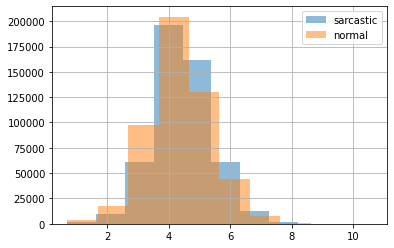

In [ ]:
train_df.loc[train_df['label'] == 1, 'parent_comment'].str.len().apply(np.log1p).hist(label='sarcastic', alpha=.5)
train_df.loc[train_df['label'] == 0, 'parent_comment'].str.len().apply(np.log1p).hist(label='normal', alpha=.5)
plt.legend();

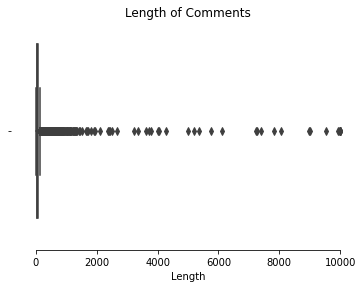

In [ ]:
sns.boxplot(x= train_df['comment'].str.len()).set(title = 'Length of Comments', xlabel = 'Length')
sns.despine(offset=10, trim=True)
plt.show()

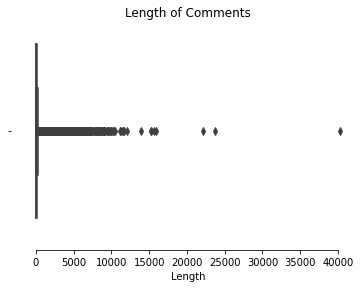

In [ ]:
sns.boxplot(x= train_df['parent_comment'].str.len()).set(title = 'Length of Comments', xlabel = 'Length')
sns.despine(offset=10, trim=True)
plt.show()

# Logistic Regression

In [ ]:
tf_idf = TfidfVectorizer(ngram_range=(1, 2), max_features=5000, min_df=2)
logit = LogisticRegressionCV(n_jobs=4, solver='lbfgs', cv = 10, 
                           random_state=17, verbose=1)
tfidf_logit_pipeline = Pipeline([('tf_idf', tf_idf), 
                                 ('logit', logit)])

In [ ]:
%%time
tfidf_logit_pipeline.fit(train_texts, y_train)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:  5.3min finished


CPU times: user 55.9 s, sys: 1.8 s, total: 57.7 s
Wall time: 6min 12s


Pipeline(memory=None,
         steps=[('tf_idf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=5000,
                                 min_df=2, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('logit',
                 LogisticRegressionCV(Cs=10, class_weight=None, cv=10,
                                      dual=False, fit_intercept=True,
   

In [ ]:
%%time
valid_pred = tfidf_logit_pipeline.predict(valid_texts)

CPU times: user 11.4 s, sys: 154 ms, total: 11.5 s
Wall time: 11.5 s


In [ ]:
accuracy_score(y_valid, valid_pred)

0.5812165582515066

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_valid, valid_pred))

              precision    recall  f1-score   support

           0       0.58      0.61      0.59    121618
           1       0.58      0.56      0.57    120968

    accuracy                           0.58    242586
   macro avg       0.58      0.58      0.58    242586
weighted avg       0.58      0.58      0.58    242586



In [ ]:
prob_pred = tfidf_logit_pipeline.predict_proba(test_texts[:10])
print(prob_pred)
print(y_test[:10])

[[0.5531078  0.4468922 ]
 [0.47618354 0.52381646]
 [0.58630434 0.41369566]
 [0.49201794 0.50798206]
 [0.35039683 0.64960317]
 [0.59389022 0.40610978]
 [0.52124588 0.47875412]
 [0.51103635 0.48896365]
 [0.51438967 0.48561033]
 [0.70416118 0.29583882]]
469600    0
639137    0
240293    0
702254    1
889040    1
118721    0
947749    1
112289    1
564578    0
1020      0
Name: label, dtype: int64


In [ ]:
def plot_confusion_matrix(actual, predicted, classes,
                          normalize=False,
                          title='Confusion matrix', figsize=(7,7),
                          cmap=plt.cm.Reds, path_to_save_fig=None):
    
    import itertools
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(actual, predicted).T
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    plt.figure(figsize=figsize)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)


    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="Black" if cm[i, j] > thresh else "white")

    plt.tight_layout()
    plt.ylabel('Predicted label')
    plt.xlabel('True label')
    
    if path_to_save_fig:
        plt.savefig(path_to_save_fig, dpi=300, bbox_inches='tight')

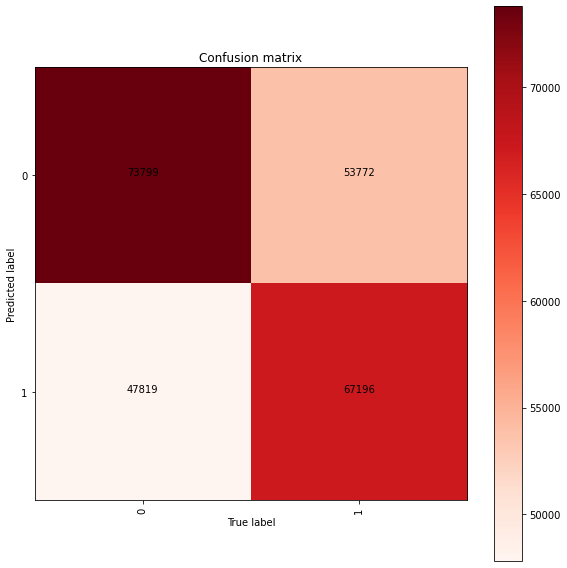

In [ ]:
plot_confusion_matrix(y_valid, valid_pred, 
                      tfidf_logit_pipeline.named_steps['logit'].classes_, figsize=(8, 8))


In [ ]:
!pip install eli5

In [ ]:
import eli5
eli5.show_weights(estimator=tfidf_logit_pipeline.named_steps['logit'],
                  vec=tfidf_logit_pipeline.named_steps['tf_idf'])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


Weight?,Feature
+2.269,sarcasm
+1.531,people
+1.439,women
+1.293,racist
+1.249,sarcastic
+1.183,woman
+1.146,police
+1.109,rape
+1.041,racism
+1.020,fault


In [ ]:
subreddits = train_df['subreddit']
train_subreddits, test_subreddits = train_test_split(subreddits,test_size=0.2, random_state=17)

In [ ]:
train_subreddits, valid_subreddits = train_test_split(train_subreddits,test_size=0.3 ,random_state=17)

In [ ]:
tf_idf_texts = TfidfVectorizer(ngram_range=(1, 2), max_features=50000, min_df=2)
tf_idf_subreddits = TfidfVectorizer(ngram_range=(1, 1))

In [ ]:
%%time
X_train_texts = tf_idf_texts.fit_transform(train_texts)
X_valid_texts = tf_idf_texts.transform(valid_texts)

CPU times: user 1min 6s, sys: 1.28 s, total: 1min 8s
Wall time: 1min 7s


In [ ]:
X_train_texts.shape, X_valid_texts.shape

((566032, 50000), (242586, 50000))

In [ ]:
%%time
X_train_subreddits = tf_idf_subreddits.fit_transform(train_subreddits)
X_valid_subreddits = tf_idf_subreddits.transform(valid_subreddits)

CPU times: user 3.03 s, sys: 23.9 ms, total: 3.05 s
Wall time: 3.05 s


In [ ]:
X_train_subreddits.shape, X_valid_subreddits.shape

((566032, 11781), (242586, 11781))

In [ ]:
from scipy.sparse import hstack
X_train = hstack([X_train_texts, X_train_subreddits])
X_valid = hstack([X_valid_texts, X_valid_subreddits])

In [ ]:
X_train.shape, X_valid.shape

((566032, 61781), (242586, 61781))

In [ ]:
logit.fit(X_train, y_train)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed: 15.6min finished


LogisticRegressionCV(Cs=10, class_weight=None, cv=10, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=4, penalty='l2',
                     random_state=17, refit=True, scoring=None, solver='lbfgs',
                     tol=0.0001, verbose=1)

In [ ]:
%%time
valid_pred_sub = logit.predict(X_valid)

CPU times: user 309 ms, sys: 105 ms, total: 414 ms
Wall time: 338 ms


In [ ]:
accuracy_score(y_valid, valid_pred_sub)

0.5973180645214481

In [ ]:
print(classification_report(y_valid, valid_pred_sub))

              precision    recall  f1-score   support

           0       0.60      0.60      0.60    121618
           1       0.60      0.60      0.60    120968

    accuracy                           0.60    242586
   macro avg       0.60      0.60      0.60    242586
weighted avg       0.60      0.60      0.60    242586



# Neural Networks


In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from keras import backend as K 
from keras.callbacks import EarlyStopping

In [ ]:
vocab_size = 5000
embedding_dim = 256
max_length = 100
trunc_type='post'
oov_tok = "<OOV>"
BATCH_SIZE = 512

In [ ]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_texts)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(train_texts)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)

valid_sequences = tokenizer.texts_to_sequences(valid_texts)
valid_padded = pad_sequences(valid_sequences,maxlen=max_length, truncating=trunc_type)
test_sequences = tokenizer.texts_to_sequences(test_texts)
test_padded = pad_sequences(test_sequences,maxlen=max_length, truncating=trunc_type)

In [ ]:
print(train_texts[22])
print(sequences[22])

i still doubt that " all conservatives stand for is defeating liberals " . if you use the election of trump as an example for the failure of modern conservatism , is it also fair to use the election of hillary clinton as a representative for modern liberalism ? i guess not. and the " all conservatives stand for is defeating liberals " could be applied vice versa if you only listen to people who are the loudest.
[1, 688, 3, 1, 268, 2767]


In [ ]:
print(padded[22])

## CNN


In [ ]:
K.clear_session()
model_conv = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(32,5,activation='relu'),
    tf.keras.layers.MaxPooling1D(2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv1D(64,3,activation='relu'),
    tf.keras.layers.MaxPooling1D(2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Conv1D(128,3,activation='relu'),
    tf.keras.layers.MaxPooling1D(2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
es = EarlyStopping(patience=4)
model_conv.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
model_conv.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 256)          1280000   
_________________________________________________________________
conv1d (Conv1D)              (None, 96, 32)            40992     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 48, 32)            0         
_________________________________________________________________
dropout (Dropout)            (None, 48, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 46, 64)            6208      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 23, 64)            0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 23, 64)            0

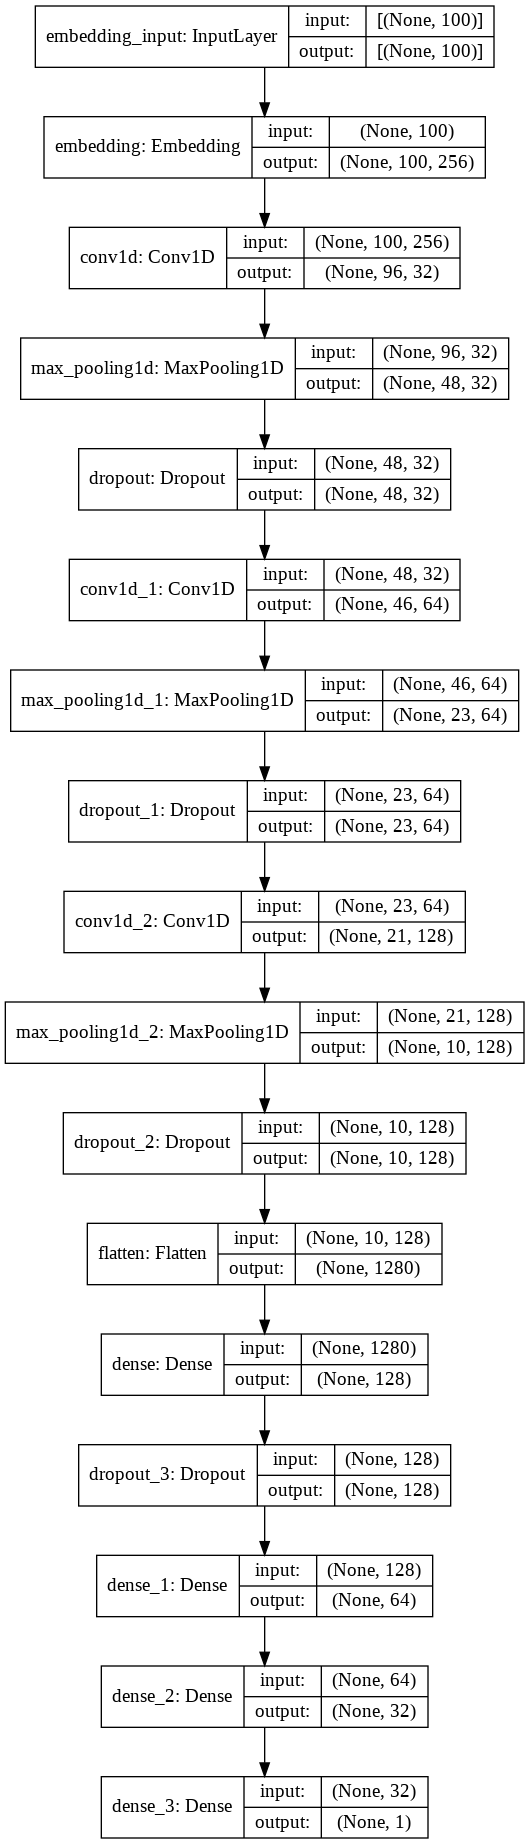

In [ ]:
tf.keras.utils.plot_model(
    model_conv, to_file='model_conv.png',
    show_layer_names=True,
    show_shapes= True
)

In [ ]:
num_epochs = 20
history=model_conv.fit(padded,
                       y_train,
                       epochs=num_epochs,
                       validation_data=(valid_padded, y_valid),
                       batch_size=BATCH_SIZE,
                       callbacks = [es])

Epoch 1/20
1106/1106 [==============================] - 711s 642ms/step - loss: 0.6842 - accuracy: 0.5532 - val_loss: 0.6796 - val_accuracy: 0.5684
Epoch 2/20
1106/1106 [==============================] - 709s 642ms/step - loss: 0.6758 - accuracy: 0.5774 - val_loss: 0.6802 - val_accuracy: 0.5689
Epoch 3/20
1106/1106 [==============================] - 709s 641ms/step - loss: 0.6708 - accuracy: 0.5878 - val_loss: 0.6785 - val_accuracy: 0.5704
Epoch 4/20
1106/1106 [==============================] - 704s 636ms/step - loss: 0.6644 - accuracy: 0.5991 - val_loss: 0.6798 - val_accuracy: 0.5688
Epoch 5/20
1106/1106 [==============================] - 703s 635ms/step - loss: 0.6561 - accuracy: 0.6107 - val_loss: 0.6819 - val_accuracy: 0.5656
Epoch 6/20
1106/1106 [==============================] - 703s 636ms/step - loss: 0.6456 - accuracy: 0.6239 - val_loss: 0.6871 - val_accuracy: 0.5603
Epoch 7/20
1106/1106 [==============================] - 703s 635ms/step - loss: 0.6335 - accuracy: 0.6371 - val_

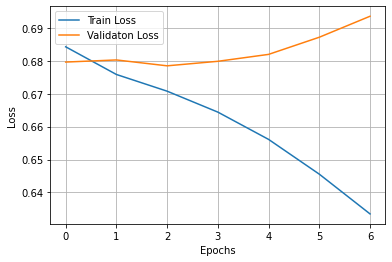

In [ ]:
plt.plot(history.history["loss"],label = "Train Loss")
plt.plot(history.history["val_loss"],label = "Validaton Loss")
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('cnn_loss.png')
plt.show()

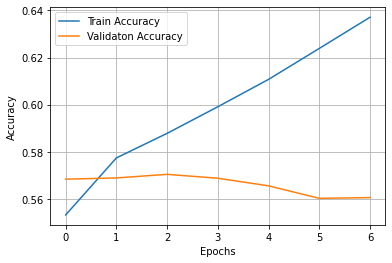

In [ ]:
plt.figure()
plt.plot(history.history["accuracy"],label = "Train Accuracy")
plt.plot(history.history["val_accuracy"],label = "Validaton Accuracy")
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('cnn_acc.png')
plt.show()

In [ ]:
print("Evaluate on test data")
results = model_conv.evaluate(test_padded, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on test data
395/395 [==============================] - 46s 115ms/step - loss: 0.6915 - accuracy: 0.5622
test loss, test acc: [0.6914902329444885, 0.5622369050979614]


## LSTM


In [ ]:
lstm_out = 64
K.clear_session()

model_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim,input_length = max_length),
    tf.keras.layers.SpatialDropout1D(0.4),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_out,return_sequences=True)),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
    
])
es = EarlyStopping(patience=4)
model_lstm.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model_lstm.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 256)          1280000   
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 100, 256)          0         
_________________________________________________________________
bidirectional (Bidirectional (None, 100, 128)          164352    
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2

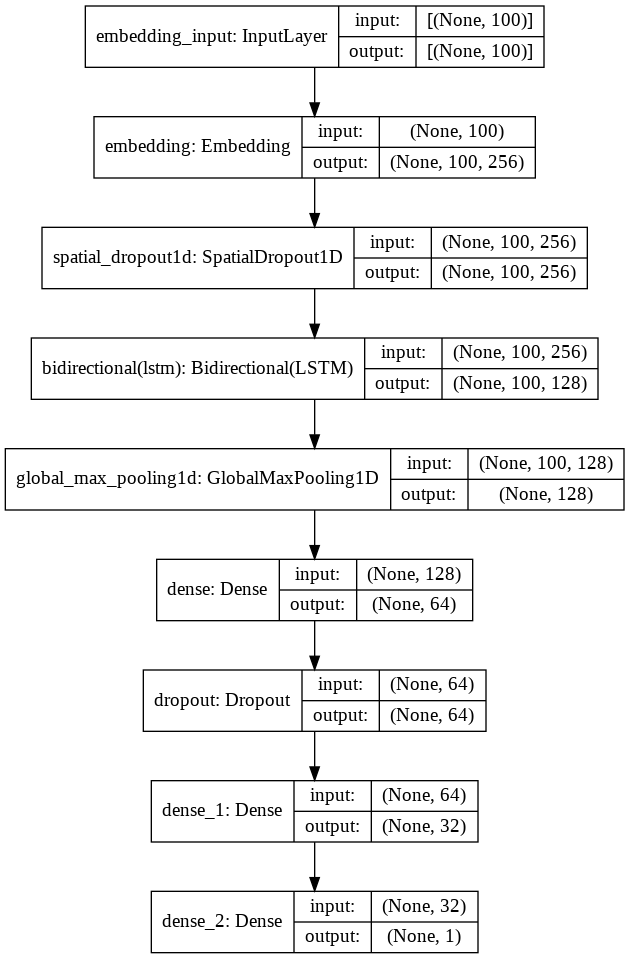

In [ ]:
tf.keras.utils.plot_model(
    model_lstm, to_file='model_lstm.png',
    show_layer_names=True,
    show_shapes= True
)

In [ ]:
num_epochs = 20
history_lstm=model_lstm.fit(padded,
                            y_train,
                            epochs=num_epochs,
                            batch_size=BATCH_SIZE,
                            validation_data = (valid_padded, y_valid),
                            callbacks = [es]
                            )

Epoch 1/20
1106/1106 [==============================] - 1741s 2s/step - loss: 0.6773 - accuracy: 0.5700 - val_loss: 0.6717 - val_accuracy: 0.5847
Epoch 2/20
1106/1106 [==============================] - 1735s 2s/step - loss: 0.6675 - accuracy: 0.5915 - val_loss: 0.6714 - val_accuracy: 0.5862
Epoch 3/20
1106/1106 [==============================] - 1735s 2s/step - loss: 0.6621 - accuracy: 0.5998 - val_loss: 0.6724 - val_accuracy: 0.5842
Epoch 4/20
1106/1106 [==============================] - 1734s 2s/step - loss: 0.6568 - accuracy: 0.6077 - val_loss: 0.6730 - val_accuracy: 0.5829
Epoch 5/20
1106/1106 [==============================] - 1738s 2s/step - loss: 0.6519 - accuracy: 0.6136 - val_loss: 0.6727 - val_accuracy: 0.5822
Epoch 6/20
1106/1106 [==============================] - 1763s 2s/step - loss: 0.6459 - accuracy: 0.6209 - val_loss: 0.6751 - val_accuracy: 0.5800


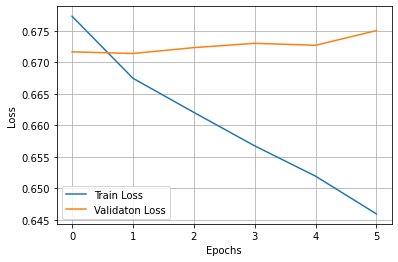

In [ ]:
plt.plot(history_lstm.history["loss"],label = "Train Loss")
plt.plot(history_lstm.history["val_loss"],label = "Validaton Loss")
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('lstm_loss.png')
plt.show()


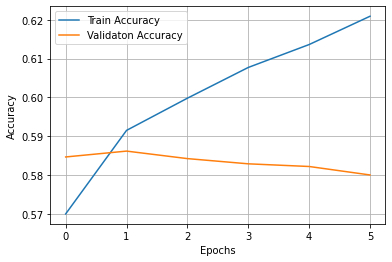

In [ ]:
plt.figure()
plt.plot(history_lstm.history["accuracy"],label = "Train Accuracy")
plt.plot(history_lstm.history["val_accuracy"],label = "Validaton Accuracy")
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('lstm_acc.png')
plt.show()


In [ ]:
print("Evaluate on test data")
results = model_lstm.evaluate(test_padded, y_test, batch_size=512)
print("test loss, test acc:", results)


Evaluate on test data
395/395 [==============================] - 175s 442ms/step - loss: 0.6744 - accuracy: 0.5817
test loss, test acc: [0.6743576526641846, 0.5817466974258423]


## GRU


In [ ]:
K.clear_session()
model_gru = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(128, return_sequences=True)),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
es = EarlyStopping(patience=4)
model_gru.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model_gru.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 256)          1280000   
_________________________________________________________________
bidirectional (Bidirectional (None, 100, 256)          296448    
_________________________________________________________________
global_max_pooling1d (Global (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                8224      
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 1

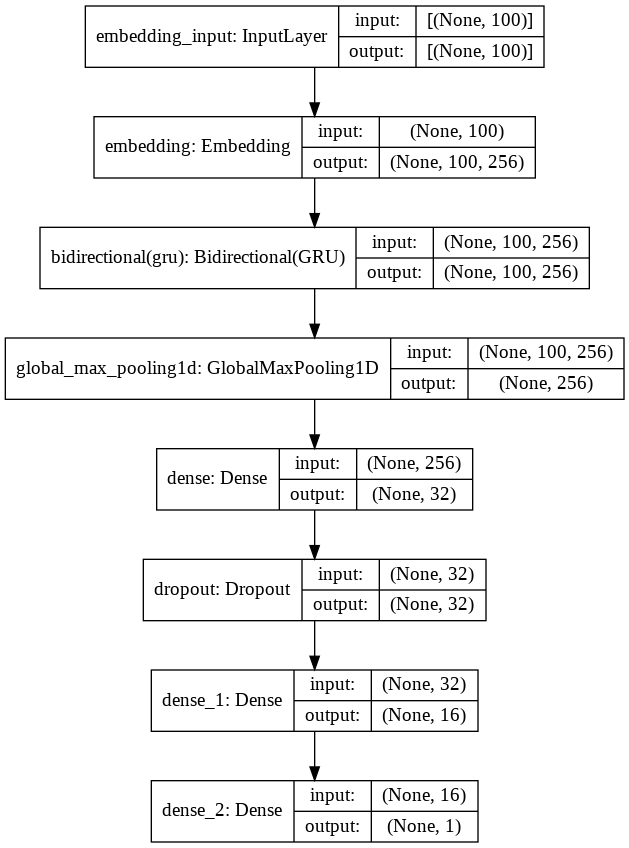

In [ ]:
tf.keras.utils.plot_model(
    model_gru, to_file='model_gru.png',
    show_layer_names=True,
    show_shapes= True
)

In [ ]:
num_epochs = 20
history_gru=model_gru.fit(padded,
                          y_train,
                          epochs=num_epochs,
                          batch_size=BATCH_SIZE ,
                          validation_data=(valid_padded, y_valid),
                          callbacks = [es])

Epoch 1/20
1106/1106 [==============================] - 2725s 2s/step - loss: 0.6777 - accuracy: 0.5721 - val_loss: 0.6759 - val_accuracy: 0.5847
Epoch 2/20
1106/1106 [==============================] - 2702s 2s/step - loss: 0.6676 - accuracy: 0.5921 - val_loss: 0.6737 - val_accuracy: 0.5857
Epoch 3/20
1106/1106 [==============================] - 2689s 2s/step - loss: 0.6612 - accuracy: 0.6019 - val_loss: 0.6739 - val_accuracy: 0.5849
Epoch 4/20
1106/1106 [==============================] - 2690s 2s/step - loss: 0.6538 - accuracy: 0.6123 - val_loss: 0.6746 - val_accuracy: 0.5799
Epoch 5/20
1106/1106 [==============================] - 2694s 2s/step - loss: 0.6441 - accuracy: 0.6245 - val_loss: 0.6732 - val_accuracy: 0.5802
Epoch 6/20
1106/1106 [==============================] - 2692s 2s/step - loss: 0.6309 - accuracy: 0.6392 - val_loss: 0.6774 - val_accuracy: 0.5706
Epoch 7/20
1106/1106 [==============================] - 2690s 2s/step - loss: 0.6129 - accuracy: 0.6576 - val_loss: 0.6806 -

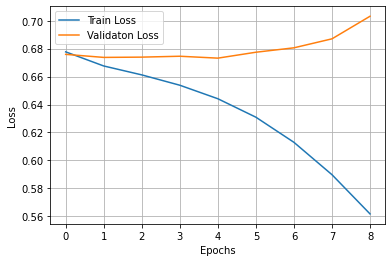

In [ ]:
plt.plot(history_gru.history["loss"],label = "Train Loss")
plt.plot(history_gru.history["val_loss"],label = "Validaton Loss")
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('gru_loss.png')
plt.show()

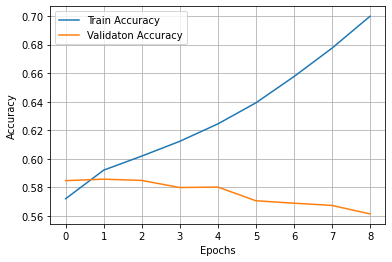

In [ ]:
plt.figure()
plt.plot(history_gru.history["accuracy"],label = "Train Accuracy")
plt.plot(history_gru.history["val_accuracy"],label = "Validaton Accuracy")
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('gru_acc.png')
plt.show()


In [ ]:
print("Evaluate GRU Model test data")
results = model_gru.evaluate(test_padded, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate GRU Model test data
395/395 [==============================] - 273s 690ms/step - loss: 0.7026 - accuracy: 0.5625
test loss, test acc: [0.7025852203369141, 0.5625039935112]
